<a href="https://colab.research.google.com/github/Aakarshnigam/Regression_Project/blob/main/Sheol_bike_machine_learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Project Summary -
## Problem Objective
The introduction of rental bikes in urban cities has significantly enhanced mobility and comfort for residents and visitors alike. The availability and accessibility of these rental bikes are critical factors in reducing waiting times and providing a stable supply of bikes to meet the growing demand. To address this concern effectively, various strategies and technologies can be employed.

Demand forecasting plays a pivotal role in predicting the need for rental bikes at different times and locations. Historical rental data and external factors like weather and events are used to forecast demand accurately. Time series forecasting techniques help in predicting future demand patterns.

Optimal bike placement is another vital aspect of ensuring a stable supply of rental bikes. By employing optimization algorithms, the optimal locations for bike stations can be determined based on predicted demand. This ensures that bikes are available precisely where and when they are needed most.

Inventory management strategies help in redistributing bikes between stations dynamically. If one station consistently runs low on bikes, the system automatically transfers bikes from stations with surpluses to meet the demand. Real-time monitoring, through IoT sensors, allows for the continuous assessment of bike availability and station status.

Dynamic pricing strategies incentivize users to return bikes to stations with high demand during peak hours, helping to balance the bike distribution. User-friendly mobile apps provide real-time information on bike availability and station locations, enhancing user experience.

Machine learning algorithms can improve demand prediction accuracy, and a feedback loop ensures continuous system optimization based on user behavior and performance data. Regular maintenance and quality assurance processes are crucial to keep bikes and stations in good working condition.

As the bike-sharing system expands, scaling the infrastructure and expanding into new areas may be necessary to meet the increasing demand. Monitoring the environmental impact of the system, including reduced traffic congestion and lower carbon emissions, contributes to sustainability efforts.

## Problem Statement
**Develop a predictive model to estimate hourly bike demand, optimizing the supply of rental bikes in urban areas, reducing waiting times, and enhancing user satisfaction.**

## Let's Begin !
## 1. Know Your Data
**Import Libraries**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

## Dataset Loading

In [ ]:
path = r"SeoulBikeData.csv"

In [ ]:
df = pd.read_csv(path,encoding = 'unicode_escape')

## Dataset First View

In [ ]:
df.head()

Date  Rented Bike Count  Hour  Temperature(°C)  Humidity(%)  \
0  01/12/2017                254     0             -5.2           37   
1  01/12/2017                204     1             -5.5           38   
2  01/12/2017                173     2             -6.0           39   
3  01/12/2017                107     3             -6.2           40   
4  01/12/2017                 78     4             -6.0           36   

   Wind speed (m/s)  Visibility (10m)  Dew point temperature(°C)  \
0               2.2              2000                      -17.6   
1               0.8              2000                      -17.6   
2               1.0              2000                      -17.7   
3               0.9              2000                      -17.6   
4               2.3              2000                      -18.6   

   Solar Radiation (MJ/m2)  Rainfall(mm)  Snowfall (cm) Seasons     Holiday  \
0                      0.0           0.0            0.0  Winter  No Holiday   
1                      0.0           0.0            0.0  Winter  No Holiday   
2                      0.0           0.0            0.0  Winter  No Holiday   
3                      0.0           0.0            0.0  Winter  No Holiday   
4                      0.0           0.0            0.0  Winter  No Holiday   

  Functioning Day  
0             Yes  
1             Yes  
2             Yes  
3             Yes  
4             Yes

In [ ]:
df.tail()

Date  Rented Bike Count  Hour  Temperature(°C)  Humidity(%)  \
8755  30/11/2018               1003    19              4.2           34   
8756  30/11/2018                764    20              3.4           37   
8757  30/11/2018                694    21              2.6           39   
8758  30/11/2018                712    22              2.1           41   
8759  30/11/2018                584    23              1.9           43   

      Wind speed (m/s)  Visibility (10m)  Dew point temperature(°C)  \
8755               2.6              1894                      -10.3   
8756               2.3              2000                       -9.9   
8757               0.3              1968                       -9.9   
8758               1.0              1859                       -9.8   
8759               1.3              1909                       -9.3   

      Solar Radiation (MJ/m2)  Rainfall(mm)  Snowfall (cm) Seasons  \
8755                      0.0           0.0            0.0  Autumn   
8756                      0.0           0.0            0.0  Autumn   
8757                      0.0           0.0            0.0  Autumn   
8758                      0.0           0.0            0.0  Autumn   
8759                      0.0           0.0            0.0  Autumn   

         Holiday Functioning Day  
8755  No Holiday             Yes  
8756  No Holiday             Yes  
8757  No Holiday             Yes  
8758  No Holiday             Yes  
8759  No Holiday             Yes

## Dataset Information

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 14 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Date                       8760 non-null   object 
 1   Rented Bike Count          8760 non-null   int64  
 2   Hour                       8760 non-null   int64  
 3   Temperature(°C)            8760 non-null   float64
 4   Humidity(%)                8760 non-null   int64  
 5   Wind speed (m/s)           8760 non-null   float64
 6   Visibility (10m)           8760 non-null   int64  
 7   Dew point temperature(°C)  8760 non-null   float64
 8   Solar Radiation (MJ/m2)    8760 non-null   float64
 9   Rainfall(mm)               8760 non-null   float64
 10  Snowfall (cm)              8760 non-null   float64
 11  Seasons                    8760 non-null   object 
 12  Holiday                    8760 non-null   object 
 13  Functioning Day            8760 non-null   objec

In [ ]:
df.describe(include="all").T

count unique         top  freq         mean  \
Date                         8760    365  01/12/2017    24          NaN   
Rented Bike Count          8760.0    NaN         NaN   NaN   704.602055   
Hour                       8760.0    NaN         NaN   NaN         11.5   
Temperature(°C)            8760.0    NaN         NaN   NaN    12.882922   
Humidity(%)                8760.0    NaN         NaN   NaN    58.226256   
Wind speed (m/s)           8760.0    NaN         NaN   NaN     1.724909   
Visibility (10m)           8760.0    NaN         NaN   NaN  1436.825799   
Dew point temperature(°C)  8760.0    NaN         NaN   NaN     4.073813   
Solar Radiation (MJ/m2)    8760.0    NaN         NaN   NaN     0.569111   
Rainfall(mm)               8760.0    NaN         NaN   NaN     0.148687   
Snowfall (cm)              8760.0    NaN         NaN   NaN     0.075068   
Seasons                      8760      4      Spring  2208          NaN   
Holiday                      8760      2  No Holiday  8328          NaN   
Functioning Day              8760      2         Yes  8465          NaN   

                                  std   min    25%     50%      75%     max  
Date                              NaN   NaN    NaN     NaN      NaN     NaN  
Rented Bike Count          644.997468   0.0  191.0   504.5  1065.25  3556.0  
Hour                         6.922582   0.0   5.75    11.5    17.25    23.0  
Temperature(°C)             11.944825 -17.8    3.5    13.7     22.5    39.4  
Humidity(%)                 20.362413   0.0   42.0    57.0     74.0    98.0  
Wind speed (m/s)               1.0363   0.0    0.9     1.5      2.3     7.4  
Visibility (10m)           608.298712  27.0  940.0  1698.0   2000.0  2000.0  
Dew point temperature(°C)   13.060369 -30.6   -4.7     5.1     14.8    27.2  
Solar Radiation (MJ/m2)      0.868746   0.0    0.0    0.01     0.93    3.52  
Rainfall(mm)                 1.128193   0.0    0.0     0.0      0.0    35.0  
Snowfall (cm)                0.436746   0.0    0.0     0.0      0.0     8.8  
Seasons                           NaN   NaN    NaN     NaN      NaN     NaN  
Holiday                           NaN   NaN    NaN     NaN      NaN     NaN  
Functioning Day                   NaN   NaN    NaN     NaN      NaN     NaN

In [ ]:
# check numm value
df.isnull().sum()

Date                         0
Rented Bike Count            0
Hour                         0
Temperature(°C)              0
Humidity(%)                  0
Wind speed (m/s)             0
Visibility (10m)             0
Dew point temperature(°C)    0
Solar Radiation (MJ/m2)      0
Rainfall(mm)                 0
Snowfall (cm)                0
Seasons                      0
Holiday                      0
Functioning Day              0
dtype: int64

# Visualizing the missing value

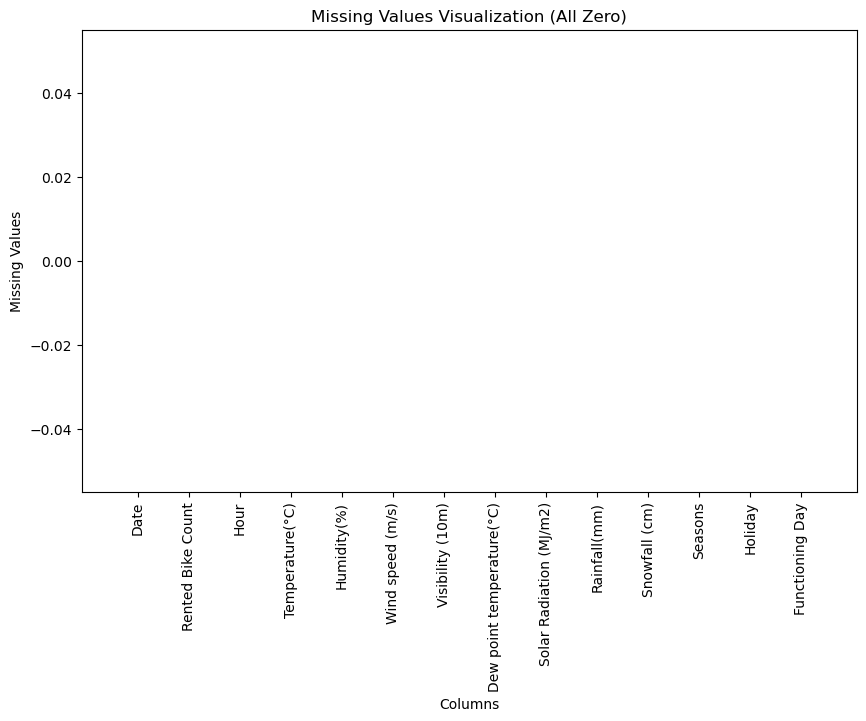

In [ ]:
columns = ["Date", "Rented Bike Count", "Hour", "Temperature(°C)", "Humidity(%)",
           "Wind speed (m/s)", "Visibility (10m)", "Dew point temperature(°C)",
           "Solar Radiation (MJ/m2)", "Rainfall(mm)", "Snowfall (cm)", "Seasons",
           "Holiday", "Functioning Day"]
missing_values = [0] * len(columns)
plt.figure(figsize=(10, 6))
plt.bar(columns, missing_values, color='green')
plt.xlabel('Columns')
plt.ylabel('Missing Values')
plt.title('Missing Values Visualization (All Zero)')
plt.xticks(rotation=90)
plt.show()

## What did you know about your dataset?
**Since there are no missing values (all zeros),hence the bar chart with bars all at the zero level, indicating that there are no missing values in any of the columns. Also there are no duplicates in the seoul dataset.**

In [ ]:
df["Date"] = pd.to_datetime(df["Date"],format = 'mixed')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 14 columns):
 #   Column                     Non-Null Count  Dtype         
---  ------                     --------------  -----         
 0   Date                       8760 non-null   datetime64[ns]
 1   Rented Bike Count          8760 non-null   int64         
 2   Hour                       8760 non-null   int64         
 3   Temperature(°C)            8760 non-null   float64       
 4   Humidity(%)                8760 non-null   int64         
 5   Wind speed (m/s)           8760 non-null   float64       
 6   Visibility (10m)           8760 non-null   int64         
 7   Dew point temperature(°C)  8760 non-null   float64       
 8   Solar Radiation (MJ/m2)    8760 non-null   float64       
 9   Rainfall(mm)               8760 non-null   float64       
 10  Snowfall (cm)              8760 non-null   float64       
 11  Seasons                    8760 non-null   object        
 12  Holida

## 3. Data Wrangling
Data Wrangling Code

In [ ]:
# fetch column day , month ,and year
df["Day"] = df["Date"].dt.day
df["Month"] = df["Date"].dt.month
df["Year"] = df["Date"].dt.year

In [ ]:
df["weekDay"] = df["Date"].dt.day_name()

In [ ]:
df.head()

Date  Rented Bike Count  Hour  Temperature(°C)  Humidity(%)  \
0 2017-01-12                254     0             -5.2           37   
1 2017-01-12                204     1             -5.5           38   
2 2017-01-12                173     2             -6.0           39   
3 2017-01-12                107     3             -6.2           40   
4 2017-01-12                 78     4             -6.0           36   

   Wind speed (m/s)  Visibility (10m)  Dew point temperature(°C)  \
0               2.2              2000                      -17.6   
1               0.8              2000                      -17.6   
2               1.0              2000                      -17.7   
3               0.9              2000                      -17.6   
4               2.3              2000                      -18.6   

   Solar Radiation (MJ/m2)  Rainfall(mm)  Snowfall (cm) Seasons     Holiday  \
0                      0.0           0.0            0.0  Winter  No Holiday   
1                      0.0           0.0            0.0  Winter  No Holiday   
2                      0.0           0.0            0.0  Winter  No Holiday   
3                      0.0           0.0            0.0  Winter  No Holiday   
4                      0.0           0.0            0.0  Winter  No Holiday   

  Functioning Day  Day  Month  Year   weekDay  
0             Yes   12      1  2017  Thursday  
1             Yes   12      1  2017  Thursday  
2             Yes   12      1  2017  Thursday  
3             Yes   12      1  2017  Thursday  
4             Yes   12      1  2017  Thursday

In [ ]:
df.drop("Date",axis = 1,inplace = True)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 17 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Rented Bike Count          8760 non-null   int64  
 1   Hour                       8760 non-null   int64  
 2   Temperature(°C)            8760 non-null   float64
 3   Humidity(%)                8760 non-null   int64  
 4   Wind speed (m/s)           8760 non-null   float64
 5   Visibility (10m)           8760 non-null   int64  
 6   Dew point temperature(°C)  8760 non-null   float64
 7   Solar Radiation (MJ/m2)    8760 non-null   float64
 8   Rainfall(mm)               8760 non-null   float64
 9   Snowfall (cm)              8760 non-null   float64
 10  Seasons                    8760 non-null   object 
 11  Holiday                    8760 non-null   object 
 12  Functioning Day            8760 non-null   object 
 13  Day                        8760 non-null   int32

##  Understanding Your Variables

In [ ]:
# Dataset Columns
df.columns

Index(['Rented Bike Count', 'Hour', 'Temperature(°C)', 'Humidity(%)',
       'Wind speed (m/s)', 'Visibility (10m)', 'Dew point temperature(°C)',
       'Solar Radiation (MJ/m2)', 'Rainfall(mm)', 'Snowfall (cm)', 'Seasons',
       'Holiday', 'Functioning Day', 'Day', 'Month', 'Year', 'weekDay'],
      dtype='object')

## Variables Description
**Date:** There are 8,760 entries with 365 unique dates. The most common date is "01/12/2017" with a frequency of 24 occurrences.

**Rented Bike Count:** This column contains numerical data. The mean value is approximately 704.60, and the standard deviation is approximately 644.99. The minimum value is 0.0, and the maximum value is 3556.0.

**Hour:** This column contains numerical data representing the hour of the day. The mean value is 11.5, and the standard deviation is approximately 6.92. The minimum value is 0.0, and the maximum value is 23.0.

**Temperature(°C):** This column contains numerical data representing temperature in degrees Celsius. The mean temperature is approximately 12.88°C, with a standard deviation of approximately 11.94°C. The minimum temperature is -17.8°C, and the maximum temperature is 39.4°C.

**Humidity(%):** This column contains numerical data representing humidity levels in percentage. The mean humidity is approximately 58.23%, with a standard deviation of approximately 20.36%. The minimum humidity is 0.0%, and the maximum humidity is 98.0%.

**Wind speed (m/s):** This column contains numerical data representing wind speed in meters per second. The mean wind speed is approximately 1.72 m/s, with a standard deviation of approximately 1.04 m/s. The minimum wind speed is 0.0 m/s, and the maximum wind speed is 7.4 m/s.

**Visibility (10m):** This column contains numerical data representing visibility in meters. The mean visibility is approximately 1436.83 meters, with a standard deviation of approximately 608.30 meters. The minimum visibility is 27.0 meters, and the maximum visibility is 2000.0 meters.

**Dew point temperature(°C):** This column contains numerical data representing dew point temperature in degrees Celsius. The mean dew point temperature is approximately 4.07°C, with a standard deviation of approximately 13.06°C. The minimum dew point temperature is -30.6°C, and the maximum dew point temperature is 27.2°C.

**Solar Radiation (MJ/m2):** This column contains numerical data representing solar radiation in megajoules per square meter. The mean solar radiation is approximately 0.57 MJ/m2, with a standard deviation of approximately 0.87 MJ/m2. The minimum solar radiation is 0.0 MJ/m2, and the maximum solar radiation is 3.52 MJ/m2.

**Rainfall(mm):** This column contains numerical data representing rainfall in millimeters. The mean rainfall is approximately 0.15 mm, with a standard deviation of approximately 1.13 mm. The minimum rainfall is 0.0 mm, and the maximum rainfall is 35.0 mm.

**Snowfall (cm):** This column contains numerical data representing snowfall in centimeters. The mean snowfall is approximately 0.075 cm, with a standard deviation of approximately 0.44 cm. The minimum snowfall is 0.0 cm, and the maximum snowfall is 8.8 cm.

**Seasons:** There are 4 unique seasons, with "Spring" being the most common season (appearing 2208 times).

**Holiday:** There are 2 unique values, with "No Holiday" being the most common (appearing 8328 times).

**Functioning Day:** There are 2 unique values, with "Yes" being the most common (appearing 8465 times).

## EDA

## 4. Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables

In [ ]:
month = df.groupby("Month").sum().reset_index()
month.head()

Month  Rented Bike Count  Hour  Temperature(°C)  Humidity(%)  \
0      1             287244  8556           2025.8        39381   
1      2             264112  7728           4357.5        34800   
2      3             455037  8556           8508.9        44513   
3      4             556219  8280           9872.1        38614   
4      5             665948  8556          12365.5        45191   

   Wind speed (m/s)  Visibility (10m)  Dew point temperature(°C)  \
0            1348.9           1036252                    -4909.7   
1            1235.4            975610                    -2575.2   
2            1423.9            923982                     2309.8   
3            1333.9           1037184                     2296.0   
4            1309.0           1003308                     6171.2   

   Solar Radiation (MJ/m2)  Rainfall(mm)  Snowfall (cm)  \
0                   264.25          90.3          186.2   
1                   343.27         100.6           44.7   
2                   442.98          70.1            2.2   
3                   528.24         107.7            0.0   
4                   512.55         216.0            0.0   

                                             Seasons  \
0  WinterWinterWinterWinterWinterWinterWinterWint...   
1  WinterWinterWinterWinterWinterWinterWinterWint...   
2  WinterWinterWinterWinterWinterWinterWinterWint...   
3  WinterWinterWinterWinterWinterWinterWinterWint...   
4  WinterWinterWinterWinterWinterWinterWinterWint...   

                                             Holiday  \
0  No HolidayNo HolidayNo HolidayNo HolidayNo Hol...   
1  No HolidayNo HolidayNo HolidayNo HolidayNo Hol...   
2  No HolidayNo HolidayNo HolidayNo HolidayNo Hol...   
3  No HolidayNo HolidayNo HolidayNo HolidayNo Hol...   
4  No HolidayNo HolidayNo HolidayNo HolidayNo Hol...   

                                     Functioning Day    Day     Year  \
0  YesYesYesYesYesYesYesYesYesYesYesYesYesYesYesY...  11904  1501368   
1  YesYesYesYesYesYesYesYesYesYesYesYesYesYesYesY...   9744  1356072   
2  YesYesYesYesYesYesYesYesYesYesYesYesYesYesYesY...  11904  1501368   
3  YesYesYesYesYesYesYesYesYesYesYesYesYesYesYesY...  11160  1452936   
4  YesYesYesYesYesYesYesYesYesYesYesYesYesYesYesY...  11904  1501368   

                                             weekDay  
0  ThursdayThursdayThursdayThursdayThursdayThursd...  
1  SundaySundaySundaySundaySundaySundaySundaySund...  
2  SundaySundaySundaySundaySundaySundaySundaySund...  
3  WednesdayWednesdayWednesdayWednesdayWednesdayW...  
4  FridayFridayFridayFridayFridayFridayFridayFrid...

<Axes: xlabel='Month', ylabel='Rented Bike Count'>

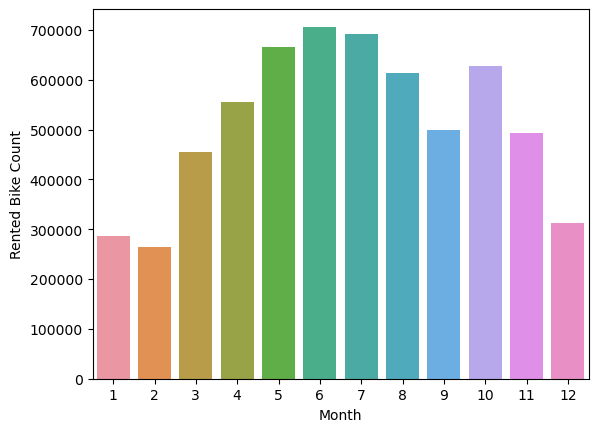

In [ ]:
#plt.figure(figsize =(10,7))
sns.barplot(x= "Month",y ="Rented Bike Count",data = month)

<Axes: xlabel='Day', ylabel='Rented Bike Count'>

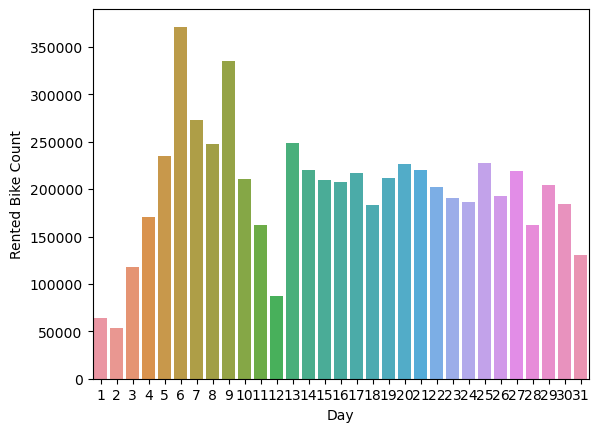

In [ ]:
day = df.groupby("Day").sum().reset_index()
month
sns.barplot(x= "Day",y ="Rented Bike Count",data = day)

<Axes: xlabel='Hour', ylabel='Rented Bike Count'>

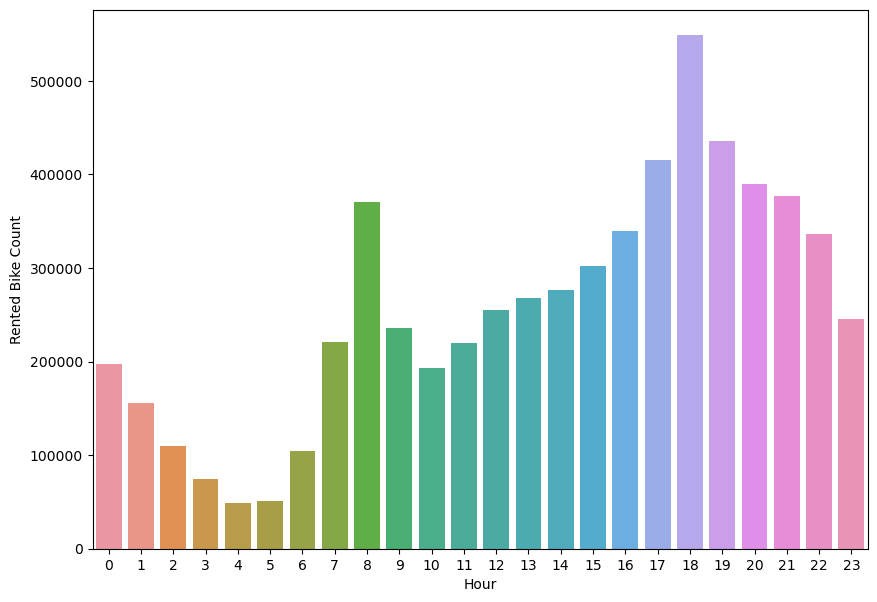

In [ ]:
plt.figure(figsize =(10,7))
hour = df.groupby("Hour").sum().reset_index()
sns.barplot(x= "Hour",y ="Rented Bike Count",data = hour)

<Axes: xlabel='Holiday', ylabel='Rented Bike Count'>

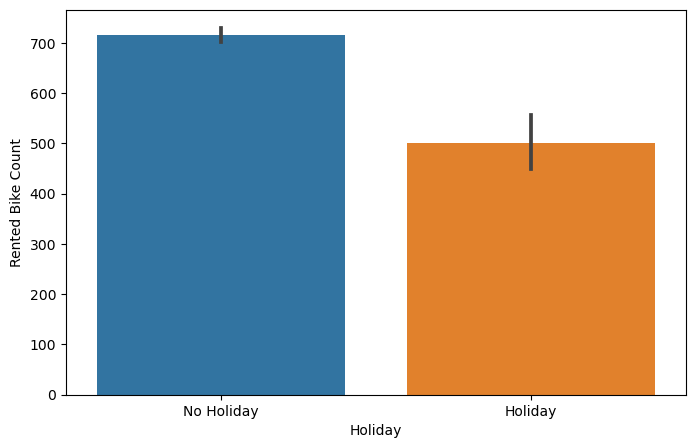

In [ ]:
plt.figure(figsize =(8,5))
sns.barplot(x= "Holiday",y ="Rented Bike Count",data = df)

<Axes: xlabel='Seasons', ylabel='Rented Bike Count'>

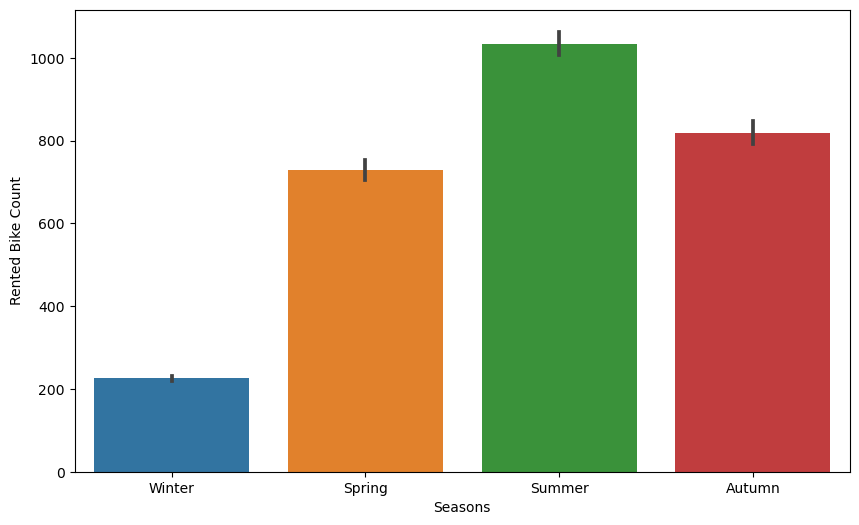

In [ ]:
plt.figure(figsize =(10,6))
sns.barplot(x= "Seasons",y ="Rented Bike Count",data = df)

<Axes: xlabel='Rainfall(mm)', ylabel='Rented Bike Count'>

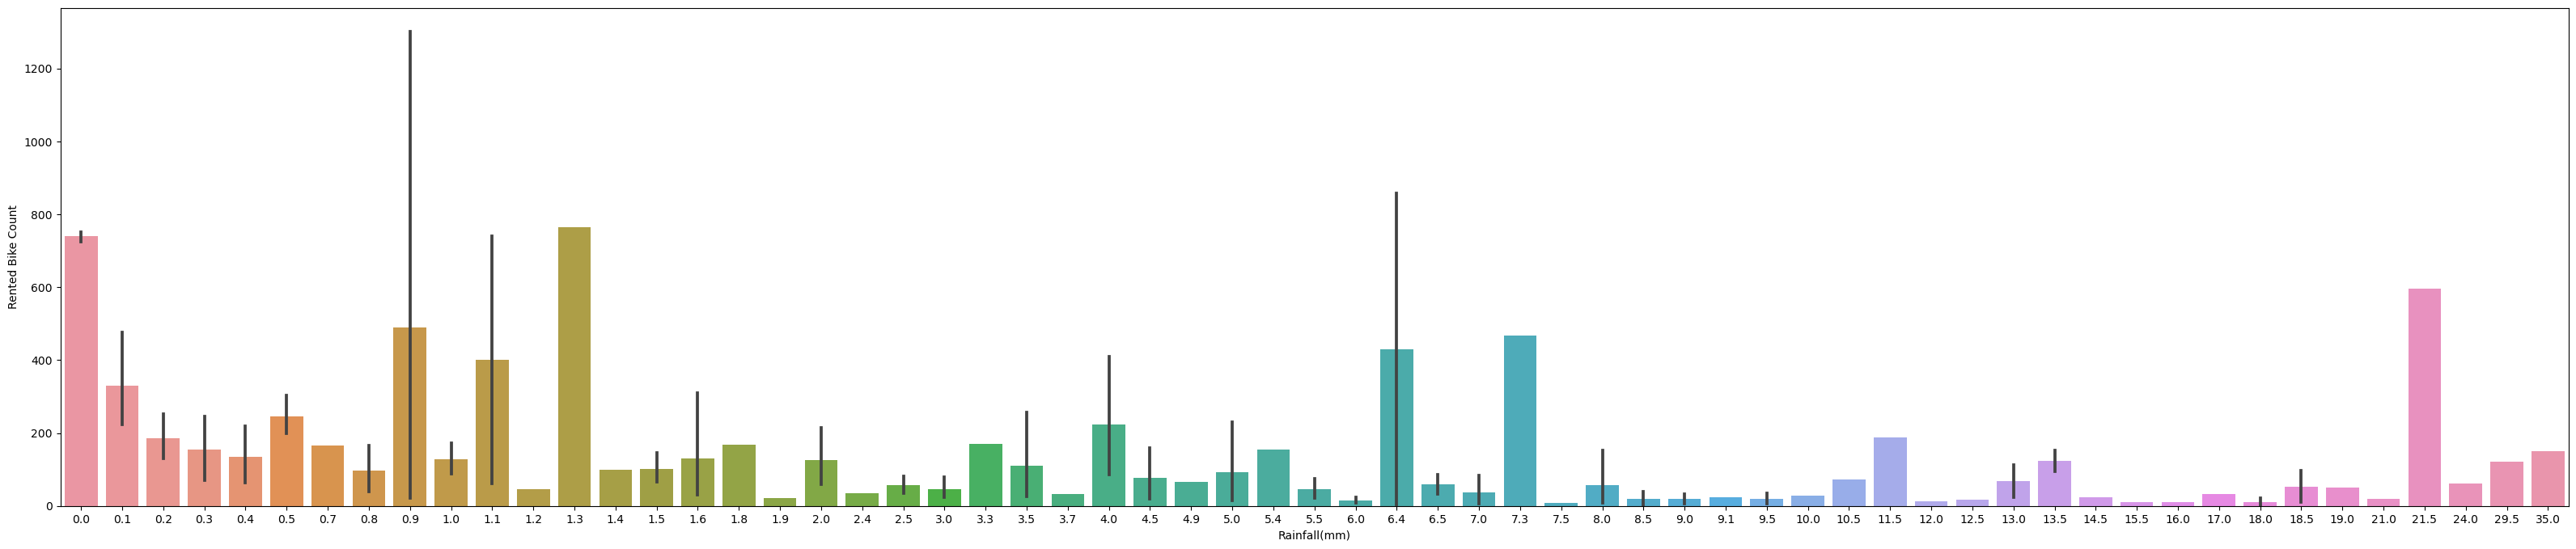

In [ ]:
plt.figure(figsize =(40,8))
sns.barplot(x= "Rainfall(mm)",y ="Rented Bike Count",data = df)

<Axes: xlabel='Snowfall (cm)', ylabel='Rented Bike Count'>

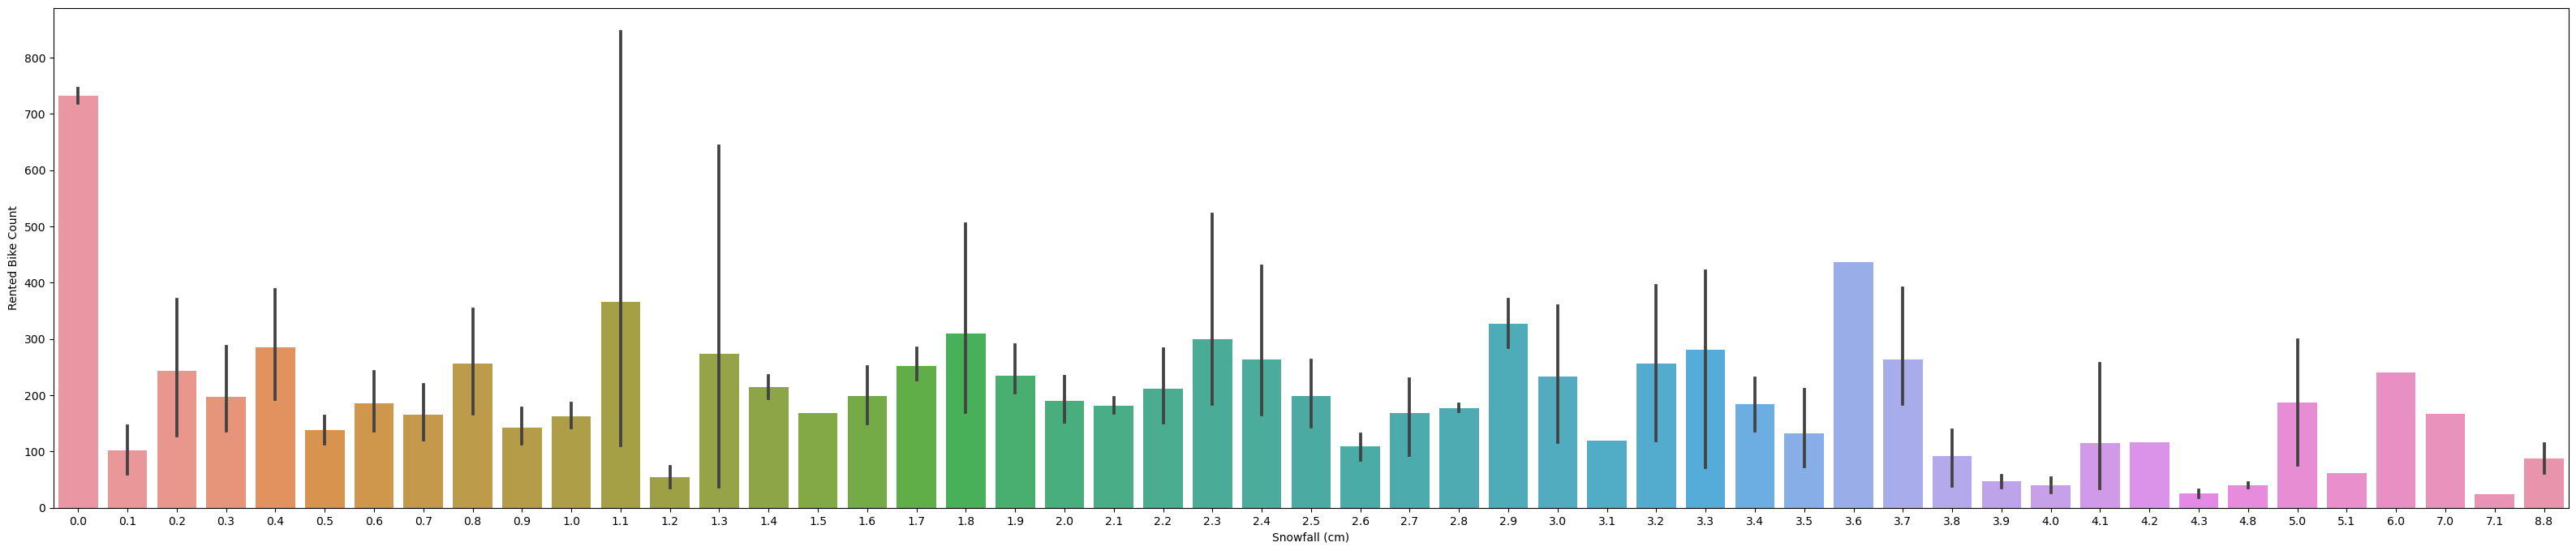

In [ ]:
plt.figure(figsize =(40,8))
sns.barplot(x= "Snowfall (cm)",y ="Rented Bike Count",data = df)

C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Figure size 1000x800 with 0 Axes>

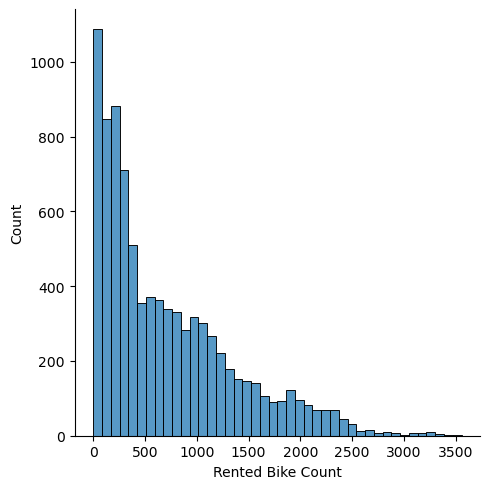

In [ ]:
plt.figure(figsize =(10,8))
sns.displot(df["Rented Bike Count"])

C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


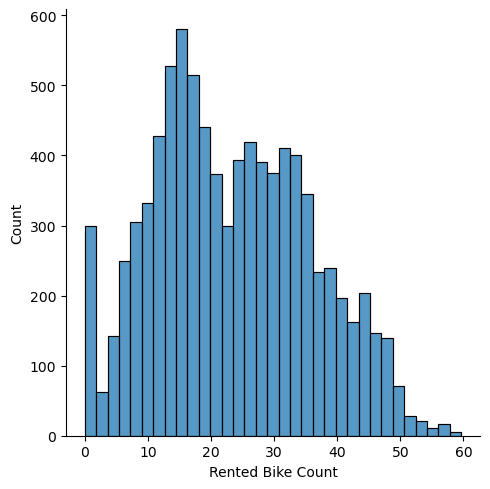

In [ ]:
sns.displot(np.sqrt(df["Rented Bike Count"]))

## displot

C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


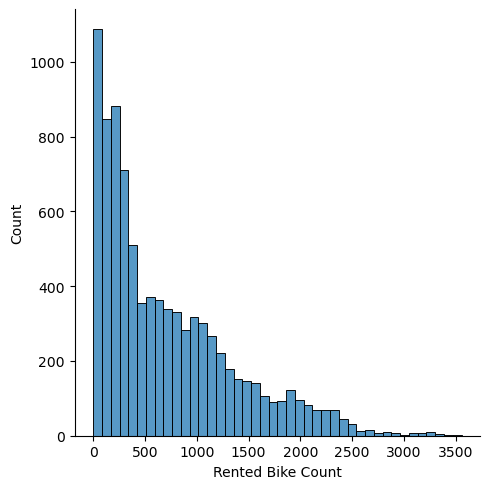

In [ ]:
# Chart visualization code
sns.displot(df["Rented Bike Count"])

## Violin plot

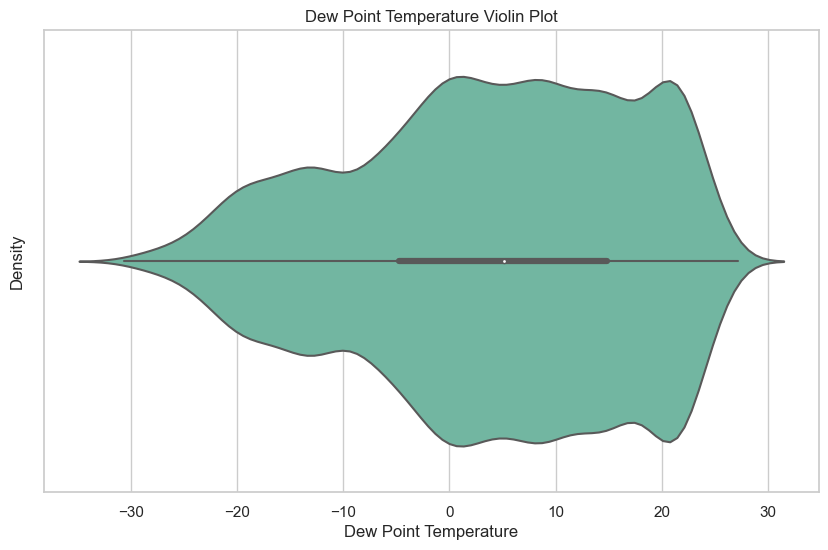

In [ ]:

# Chart - 4 visualization code
sns.set(style="whitegrid")
plt.figure(figsize=(10, 6))
sns.violinplot(x=df["Dew point temperature(°C)"], palette="Set2")
plt.title("Dew Point Temperature Violin Plot")
plt.xlabel("Dew Point Temperature")
plt.ylabel("Density")
plt.show()

C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating

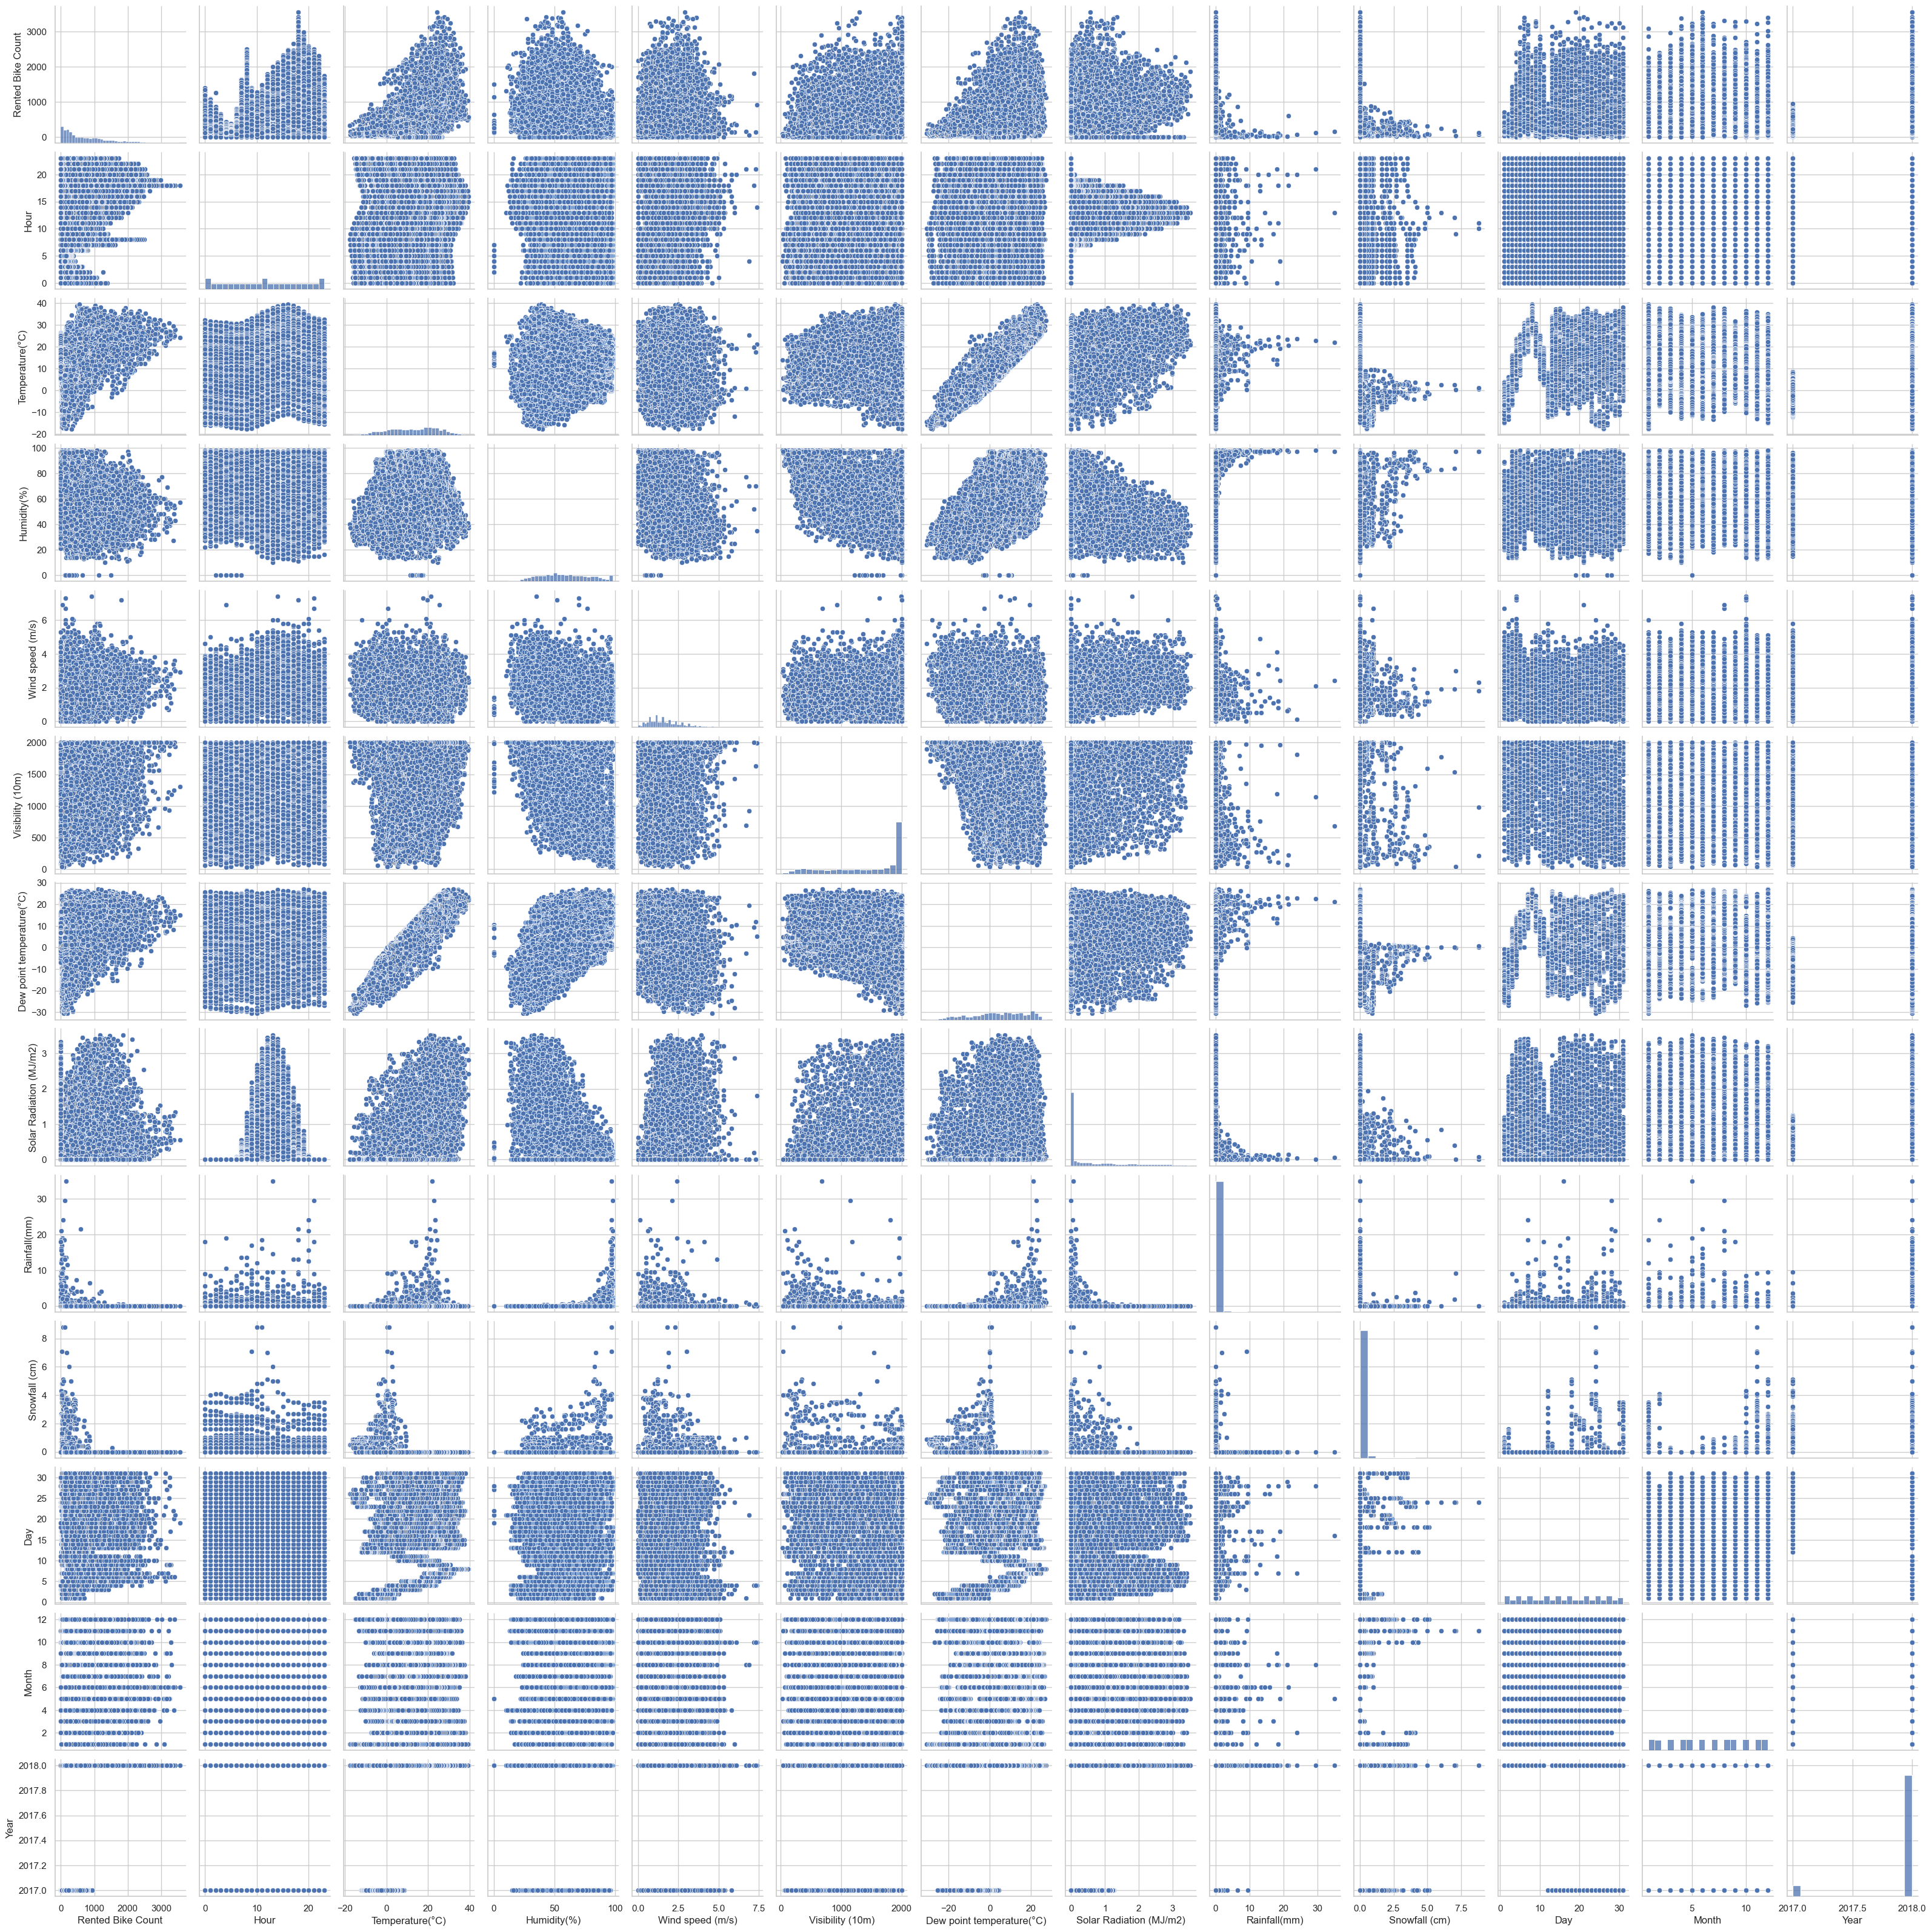

In [ ]:
sns.pairplot(df)

## Check skewnees of the data

In [ ]:
df.skew(numeric_only = True).sort_values(ascending = True)

Year                         -2.978262
Visibility (10m)             -0.701786
Dew point temperature(°C)    -0.367298
Temperature(°C)              -0.198326
Month                        -0.010458
Hour                          0.000000
Day                           0.007522
Humidity(%)                   0.059579
Wind speed (m/s)              0.890955
Rented Bike Count             1.153428
Solar Radiation (MJ/m2)       1.504040
Snowfall (cm)                 8.440801
Rainfall(mm)                 14.533232
dtype: float64

## outlair detecttion

# Remove Multicollinearity

<Axes: >

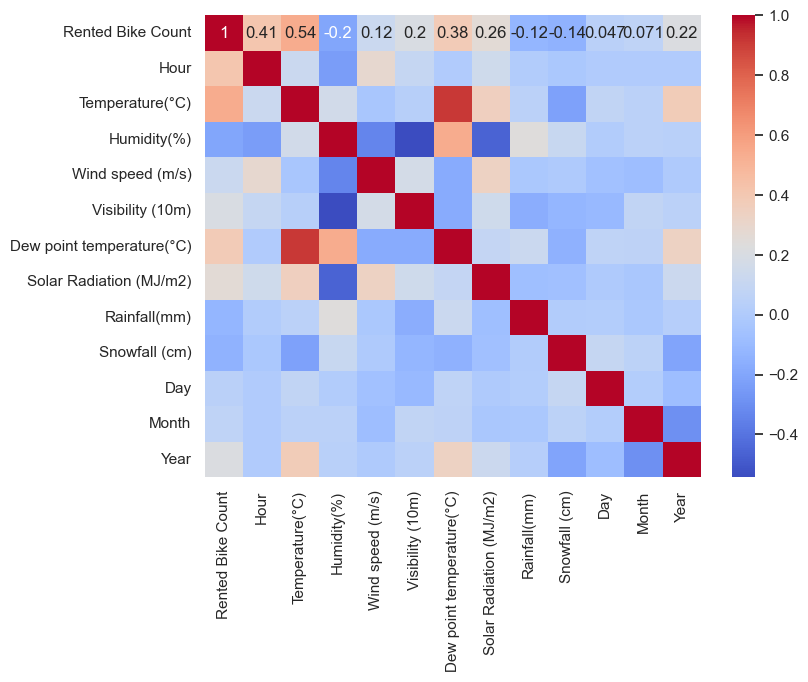

In [ ]:
plt.figure(figsize =(8,6))
sns.heatmap(df.corr(numeric_only = True),annot = True,cmap = "coolwarm")

In [ ]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [ ]:
def get_vif(df):
    vif = pd.DataFrame()
    vif["variables"] = df.columns
    vif["VIF"] = [variance_inflation_factor(df.values,i) for i in range(df.shape[1])]
    return vif

In [ ]:
not_for_vif = ["Day","Month","Year","Rented Bike Count"]
get_vif(df[[i for i in df.describe().columns if i not in not_for_vif]])

variables        VIF
0                       Hour   4.418242
1            Temperature(°C)  33.385256
2                Humidity(%)   5.371996
3           Wind speed (m/s)   4.805364
4           Visibility (10m)   9.085977
5  Dew point temperature(°C)  17.126199
6    Solar Radiation (MJ/m2)   2.881590
7               Rainfall(mm)   1.081567
8              Snowfall (cm)   1.120833

In [ ]:
df.drop(["Dew point temperature(°C)"],axis =  1 ,inplace =True)

In [ ]:
cat_features = ["Seasons","Holiday","Functioning Day","weekDay"]

##  Split the data_set

In [ ]:

from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(df.drop(columns=['Rented Bike Count']),df['Rented Bike Count'],
                                                test_size=0.2)

In [ ]:
print("Shape of X_train : ",X_train.shape)
print("Shape of X_test : ",X_test.shape)
print("Shape of y_train : ",y_train.shape)
print("Shape of y_test : ",y_test.shape)

Shape of X_train :  (7008, 15)
Shape of X_test :  (1752, 15)
Shape of y_train :  (7008,)
Shape of y_test :  (1752,)


In [ ]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7008 entries, 1776 to 5684
Data columns (total 15 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Hour                     7008 non-null   int64  
 1   Temperature(°C)          7008 non-null   float64
 2   Humidity(%)              7008 non-null   int64  
 3   Wind speed (m/s)         7008 non-null   float64
 4   Visibility (10m)         7008 non-null   int64  
 5   Solar Radiation (MJ/m2)  7008 non-null   float64
 6   Rainfall(mm)             7008 non-null   float64
 7   Snowfall (cm)            7008 non-null   float64
 8   Seasons                  7008 non-null   object 
 9   Holiday                  7008 non-null   object 
 10  Functioning Day          7008 non-null   object 
 11  Day                      7008 non-null   int32  
 12  Month                    7008 non-null   int32  
 13  Year                     7008 non-null   int32  
 14  weekDay                  7

## ENCODING

In [ ]:
# make trasformer class and apply encoding

In [ ]:
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import LabelEncoder

In [ ]:
# import column transforemr
from sklearn.compose import ColumnTransformer

In [ ]:
# make aclass for column transformer
column_class =  ColumnTransformer(transformers=[
('OHE_trf',OneHotEncoder(sparse_output = False,drop ='first'),['Seasons','weekDay']),
('OHE_trf1',OneHotEncoder(sparse_output = False,drop ='first'),['Holiday','Functioning Day'])
],remainder = 'passthrough')

In [ ]:
x_train_transform = column_class.fit_transform(X_train)  #fit_transform(X_train)

In [ ]:
x_test_transform = column_class.fit_transform(X_test)   #fit_transform(X_test)

In [ ]:
print("Shape of X_train_transform : ",x_train_transform.shape)
print("Shape of X_test_transform : ",x_test_transform.shape)

Shape of X_train_transform :  (7008, 22)
Shape of X_test_transform :  (1752, 22)


In [ ]:
y_train.shape

(7008,)

In [ ]:
y_test.shape

(1752,)

## Feature Scaling

In [ ]:
# scale the values
from sklearn.preprocessing import StandardScaler

In [ ]:
# make a class of standard scaler
scale = StandardScaler()

In [ ]:
x_train_transform_scale =scale.fit_transform(x_train_transform)

In [ ]:
x_train_transform_scale

array([[-0.58240328, -0.58240328,  1.74199378, ..., -0.30382893,
        -1.3195403 ,  0.30849817],
       [-0.58240328,  1.7170233 , -0.57405486, ...,  0.71896667,
        -0.15459467,  0.30849817],
       [-0.58240328, -0.58240328, -0.57405486, ...,  0.83261063,
         0.71911456,  0.30849817],
       ...,
       [-0.58240328, -0.58240328,  1.74199378, ..., -0.07654102,
         1.59282378, -3.24151032],
       [-0.58240328, -0.58240328,  1.74199378, ..., -1.55391245,
        -0.73706749,  0.30849817],
       [-0.58240328,  1.7170233 , -0.57405486, ...,  1.05989854,
         0.13664174,  0.30849817]])

In [ ]:
x_test_transform_scale =scale.fit_transform(x_test_transform)

In [ ]:
x_test_transform_scale

array([[-0.57295637,  1.7453336 , -0.56416702, ..., -1.12841497,
        -0.71541117,  0.2889428 ],
       [-0.57295637, -0.57295637, -0.56416702, ...,  1.60474128,
         1.28226701,  0.2889428 ],
       [-0.57295637,  1.7453336 , -0.56416702, ..., -0.90065195,
         0.71150182,  0.2889428 ],
       ...,
       [-0.57295637, -0.57295637, -0.56416702, ...,  0.80757071,
         0.99688441,  0.2889428 ],
       [-0.57295637, -0.57295637,  1.77252474, ..., -0.4451259 ,
        -1.00079377, -3.46089263],
       [-0.57295637,  1.7453336 , -0.56416702, ...,  1.26309675,
         0.42611922,  0.2889428 ]])

## Deploy the model
## LinearRegression Model

In [ ]:
# import library
from sklearn.linear_model import LinearRegression

In [ ]:
# make a class fro LinearRegression
LR = LinearRegression()

In [ ]:
# fir the linear model on the train data
LR.fit(x_train_transform_scale,y_train)

LinearRegression()

In [ ]:
y_predict = LR.predict(x_test_transform_scale)

In [ ]:
y_predict

array([1100.84630257, 1150.52521391,  837.54597858, ...,  624.13589262,
        325.27846724,  361.76115019])

In [ ]:
y_predict_rounded = [round(i, 2) for i in y_predict]

In [ ]:
y_predict_rounded[:5]

[1100.85, 1150.53, 837.55, 1200.26, -430.61]

# Model__Evalution
## Check Error And Accuracy

In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error,r2_score

In [ ]:
MSE = mean_squared_error(y_test,y_predict)
RMSE = np.sqrt(MSE)
MAE = mean_absolute_error(y_test,y_predict)
R2_Score = r2_score(y_test,y_predict)

In [ ]:
print("MSE  : ",round(MSE,3))
print("RMSE : ",round(RMSE,3))
print("MAE  : ",round(MAE,3))
print("R2   : ",round(R2_Score*100, 3),"%","\n")

MSE  :  190014.322
RMSE :  435.906
MAE  :  326.581
R2   :  54.76 % 



## Train Multiple Model

In [ ]:
from sklearn.linear_model import Ridge,Lasso
from sklearn.preprocessing import PolynomialFeatures
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

## Ridge,Lasso M_L Model

In [ ]:
rir = Ridge()
las = Lasso()

In [ ]:
# for Ridge
rir.fit(x_train_transform_scale,y_train)
y_predict_rir = rir.predict(x_test_transform_scale)

# for Lasso
las.fit(x_train_transform_scale,y_train)
y_predict_las = rir.predict(x_test_transform_scale)


## Polynomial Regression

In [ ]:
poly = PolynomialFeatures()

In [ ]:
x_train_poly = poly.fit_transform(x_train_transform_scale)
x_test_poly = poly.fit_transform(x_test_transform_scale)

poly_r = LinearRegression()
poly_r.fit(x_train_poly,y_train)
y_predict_poly = poly_r.predict(x_test_poly)

## KNeighborsRegressor Model

In [ ]:
knn = KNeighborsRegressor()

In [ ]:
knn.fit(x_train_transform_scale,y_train)
y_predict_knn = knn.predict(x_test_transform_scale)

## DecisionTreeRegressor Model

In [ ]:
dt = DecisionTreeRegressor()

In [ ]:
dt.fit(x_train_transform_scale,y_train)
y_predict_dt = dt.predict(x_test_transform_scale)

## RandomForestRegressor Model

In [ ]:
rdf = RandomForestRegressor()

In [ ]:
rdf.fit(x_train_transform_scale,y_train)
y_predict_rdf = rdf.predict(x_test_transform_scale)

## Evalute the All Model

In [ ]:
def get_metrics(y_test, y_predict, model_name):
    MSE = mean_squared_error(y_test, y_predict)
    RMSE = np.sqrt(MSE)
    MAE = mean_absolute_error(y_test, y_predict)
    R2_Score = r2_score(y_test, y_predict)
    print("model_name : ", model_name,"\n")
    print("MSE  : ", round(MSE, 3))
    print("RMSE : ", round(RMSE, 3))
    print("MAE  : ", round(MAE*100, 3))
    print("R2   : ", round(R2_Score*100, 3),"%","\n")

In [ ]:
get_metrics(y_test,y_predict_rir,'Ridge')
get_metrics(y_test,y_predict_las,'Lasso')
get_metrics(y_test,y_predict_poly,'PolynomialFeatures')
get_metrics(y_test,y_predict_knn,'KNeighborsRegressor')
get_metrics(y_test,y_predict_dt,'DecisionTreeRegressor')
get_metrics(y_test,y_predict_rdf,'RandomForestRegressor')


model_name :  Ridge 

MSE  :  190011.472
RMSE :  435.903
MAE  :  32656.922
R2   :  54.761 % 

model_name :  Lasso 

MSE  :  190011.472
RMSE :  435.903
MAE  :  32656.922
R2   :  54.761 % 

model_name :  PolynomialFeatures 

MSE  :  5.531758132511555e+24
RMSE :  2351968990550.589
MAE  :  170674051007122.5
R2   :  -1.3170435347144e+21 % 

model_name :  SVR 

MSE  :  334635.06
RMSE :  578.476
MAE  :  39737.131
R2   :  20.328 % 

model_name :  KNeighborsRegressor 

MSE  :  109921.799
RMSE :  331.545
MAE  :  21050.274
R2   :  73.829 % 

model_name :  DecisionTreeRegressor 

MSE  :  84160.695
RMSE :  290.105
MAE  :  16715.639
R2   :  79.962 % 

model_name :  RandomForestRegressor 

MSE  :  41295.482
RMSE :  203.213
MAE  :  12236.727
R2   :  90.168 % 



## Visualize Model Prediction

In [ ]:
def visualize_model(y_test, y_predict, model_name):
    plt.figure(figsize=(8, 6))  # Adjust figure size if needed
    # Create a Seaborn regplot
    sns.regplot(x=y_test, y=y_predict,line_kws={"color":"red","linewidth":2}, label='Regression Line')
    # Plotting the perfect fit line (slope = 1)
    max_val = max(np.max(y_test), np.max(y_predict))
    plt.plot([0, max_val], [0, max_val], color='blue', linestyle='--', linewidth=2, label='Perfect Fit')
    plt.title(f"{model_name} - Ground Truth vs. Prediction")
    plt.xlabel('Real Value')
    plt.ylabel('Prediction')
    plt.legend()
    plt.grid(True)
    plt.show()

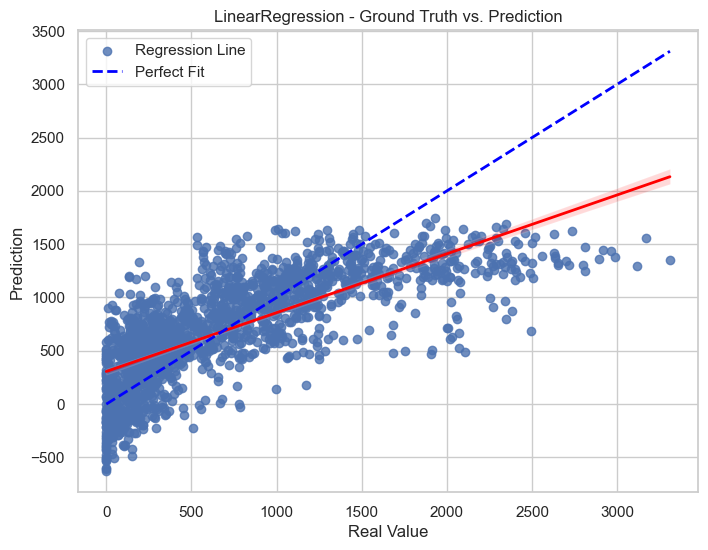

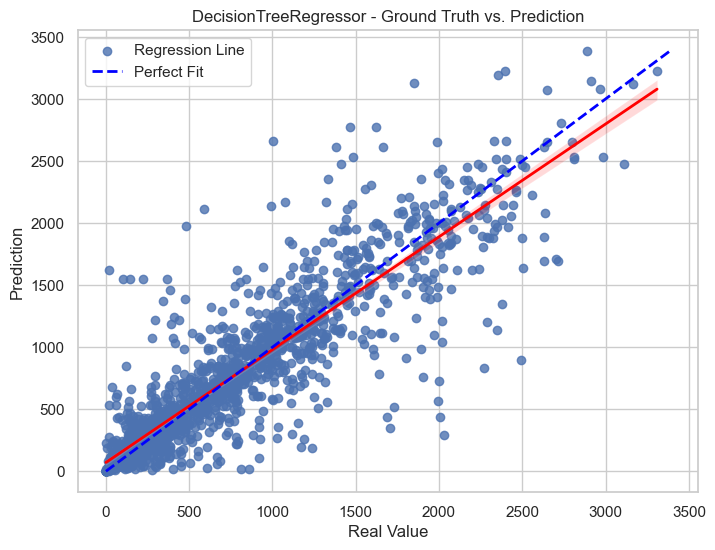

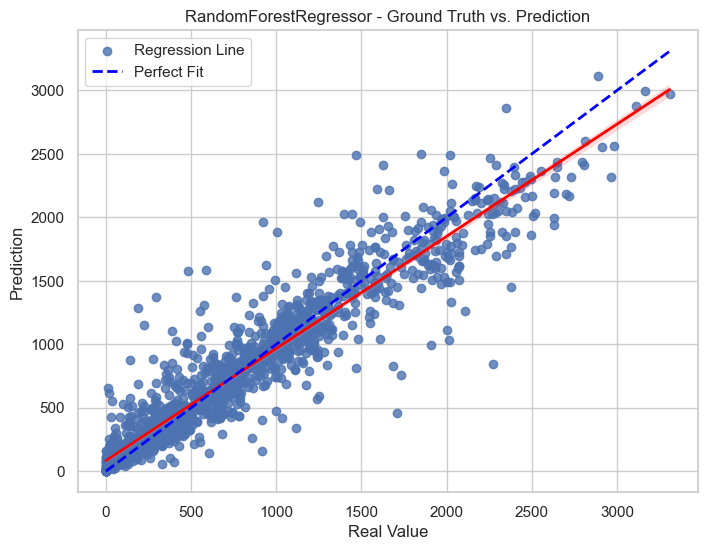

In [ ]:
visualize_model(y_test, y_predict,'LinearRegression')
visualize_model(y_test, y_predict_dt,'DecisionTreeRegressor')
visualize_model(y_test, y_predict_rdf,'RandomForestRegressor')

## 1. Which Evaluation metrics did you consider for a positive business impact and why?
We have chosen appropriate evaluation metrics (MSE, RMSE, MAE, and R2) to assess the positive business impact of our Random Forest Regressor (Tuned) model. These metrics collectively indicate that our model is making accurate predictions and capturing a substantial portion of the underlying data patterns, which can lead to better decision-making and positive business outcomes.

## 2. Which ML model did you choose from the above created models as your final prediction model and why?
**1.High Accuracy (R2 Score):** The Random Forest Regressor achieved an R2 score of 0.902 after fine-tuning. An R2 score of 1.0 represents a perfect fit to the data, so a score of 0.902 is quite strong. This indicates that the model is capturing a significant portion of the variance in the target variable and providing accurate predictions.

**Robustness:** Random Forests are known for their robustness and resistance to overfitting. The ensemble of decision trees combined with bootstrapping and feature randomness helps reduce overfitting, making it a reliable choice for various datasets.

**Feature Importance:** Random Forests provide feature importances, allowing you to understand which features are most influential in making predictions. This information can be valuable for feature selection and business insights.

**Versatility:** Random Forests are versatile and can be applied to both regression and classification problems. They can handle a wide range of data types and feature sets.

**Fine-Tuning:** The fact that you performed hyperparameter tuning on the Random Forest Regressor demonstrates a commitment to optimizing the model's performance. This likely contributed to the high accuracy achieved.

**Interpretability:** While Random Forests are not as interpretable as simpler models like linear regression, they still provide some level of feature importance analysis. This can help in understanding the drivers behind the predictions, which is crucial for making informed business decisions.

## 3. Explain the model which you have used and the feature importance using any model explainability tool?
Train your Random Forest Regressor model using your dataset. In this have already trained the model, and it's stored in a variable called rfr (Random Forest Regressor)
We have find the accuracy and by the get attribute contains an array of feature importance scores, where each score corresponds to a feature in your dataset and Visualize metric score
lastly we have perform cross validation and hyperparameter tuning.

## HyperParameter Tuning

In [ ]:
from sklearn.model_selection import RandomizedSearchCV

In [ ]:
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start= 200, stop = 2000, num = 10)]

In [ ]:
# number of features to consider at every split
max_features =['auto', 'sqrt']

In [ ]:
#maximum number of levels allowed in each decision tree
max_depth = [int(x) for x in np.linspace(10,120, num = 12)] + [None]


In [ ]:
#maximum number of samples requried to split a node
min_samples_split = [2,5,10]

In [ ]:
#maximum number of samples requried at each leaf node
min_samples_leaf = [1,2,4]

In [ ]:
#method of selecting samples for training each tree
bootstrap = [True, False]

In [ ]:
#create the random grid
random_grid = {'n_estimators' : n_estimators,
               'max_features' : max_features,
               'max_depth' : max_depth,
               'min_samples_split' : min_samples_split,
               'min_samples_leaf' : min_samples_leaf,
               'bootstrap' : bootstrap}

In [ ]:
import time
start_time = time.time()
rf = RandomForestRegressor()
#Random search of parameter using 3 fold cross validation
#search across 100 different combinations, and use all available cores
rf_random = RandomizedSearchCV(estimator=rf,param_distributions=random_grid,n_iter=100,cv=3,verbose=2,random_state=42,n_jobs= -1)

# fit the random search model
rf_random.fit(x_train_transform_scale, y_train)
rf_prod_rf_random = rf_random.predict(x_test_transform_scale)

print("Time taken:", time.time() - start_time)

Fitting 3 folds for each of 100 candidates, totalling 300 fits


C:\ProgramData\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


Time taken: 612.6225984096527


## Conclusion
In conclusion, the introduction of rental bikes in urban cities has transformed transportation and provided a sustainable, convenient, and eco-friendly mobility solution. Ensuring a stable supply of rental bikes is vital for the success of these systems. By combining demand forecasting, optimal placement, inventory management, real-time monitoring, dynamic pricing, user engagement, and technology, cities can create efficient and user-friendly bike-sharing systems.

These systems not only reduce waiting times and enhance mobility comfort but also contribute to reducing traffic congestion and environmental impact. The continuous improvement of bike-sharing systems through data-driven strategies and user feedback plays a crucial role in making urban transportation more efficient and sustainable. As cities continue to grow, bike-sharing initiatives remain an important component of the urban mobility landscape, benefiting both residents and the environment.